In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(data_url)

In [16]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
160466,ZWE,Africa,Zimbabwe,2022-02-04,230170.0,0.0,119.571,5357.0,0.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160467,ZWE,Africa,Zimbabwe,2022-02-05,230402.0,232.0,141.000,5362.0,5.0,4.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160468,ZWE,Africa,Zimbabwe,2022-02-06,230402.0,0.0,134.571,5362.0,0.0,3.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160469,ZWE,Africa,Zimbabwe,2022-02-07,230402.0,0.0,105.143,5362.0,0.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160470,ZWE,Africa,Zimbabwe,2022-02-08,230603.0,201.0,107.429,5366.0,4.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
print(data.shape)

(160471, 67)


         date  new_cases_UA  new_cases_PL
0  2022-02-02       35892.0       56051.0
1  2022-02-03       40745.0       54475.0
2  2022-02-04       45022.0       47536.0
3  2022-02-05       43836.0       45748.0
4  2022-02-06       29306.0       34700.0


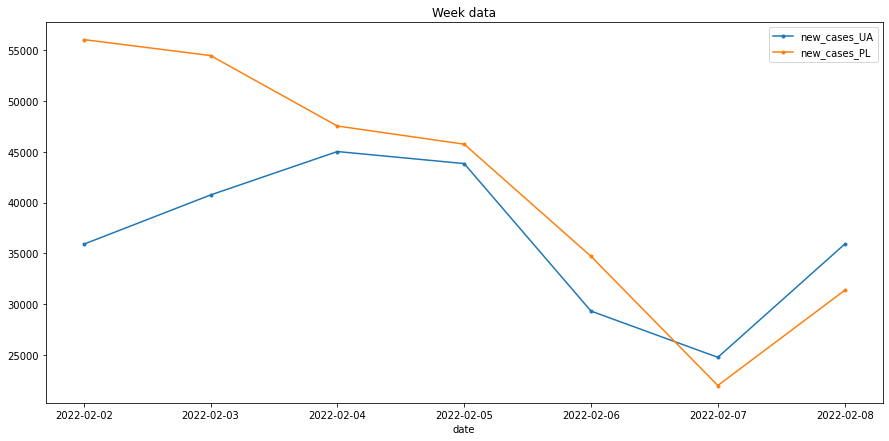

In [5]:
# week statistik
df_week_UA = data[data['iso_code'] == 'UKR'].tail(7)
df_week_PL = data[data['iso_code'] == 'POL'].tail(7)

df_week = pd.DataFrame({
    'date': df_week_UA.date.values,
    'new_cases_UA': df_week_UA.new_cases.values,
    'new_cases_PL': df_week_PL.new_cases.values,
}) 
print(df_week.head())
df_week.plot(x="date", y=["new_cases_UA","new_cases_PL"], figsize=(15, 7), title="Week data", marker=".")
plt.show()

In [11]:
data.date = pd.to_datetime(data.date, '%Y%m%d')
data.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [65]:
total_cases = np.max(data[data['location'] == 'World']['total_cases'])
total_cases

400777183.0